In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from ResNet import CNN
import matplotlib.pyplot as plt
import PIL
import numpy as np
import math

from tqdm import trange
import torch.optim as optim
import torch
import torch.nn as nn
from dataLoader import CustomDataset
import torch.nn.functional as F
from get_data import Get_Data
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import albumentations as A
import get_data 
import importlib

Using cache found in /home/hpc/rzku/mlvl043h/.cache/torch/hub/pytorch_vision_v0.6.0


In [2]:
#load the data
imageH = 512
imageW = 512

key_points_path_train, key_points_path_test = Get_Data().patient_level_split()
#X_train, y_train = Get_Data().json_to_data(key_points_path_train, imageH, imageW)
X_test, y_test = Get_Data().json_to_data(key_points_path_test, imageH, imageW)

In [3]:
print(len(key_points_path_train))
print(len(key_points_path_test))

173
18


In [7]:
191 - int((173+18)*0.85)

29

In [4]:
#make a testloader
test_dataset = CustomDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)

In [5]:
def slope(x1, y1, x2, y2): # Line slope given two points:
    return (y2-y1)/(x2-x1)
def calculateAngle(keyPt)->float:
        '''
        parameters:
            keyPts: keypoints in ndarray
        return:
            angles: angles in ndarray
        '''
        #get the keypoints
        shaft_1 = keyPt[0]
        shaft_2 = keyPt[1]
        tangent_1 = keyPt[2]
        tangent_2 = keyPt[3]
        s1 = slope(shaft_1[0], shaft_1[1], shaft_2[0], shaft_2[1])
        s2 = slope(tangent_1[0], tangent_1[1], tangent_2[0], tangent_2[1])
        #calculate the angle
        angle = abs(np.arctan(s1) - np.arctan(s2))
        #convert to degrees
        angle = angle*180/math.pi
        if angle<90:
            angle = 180-angle
        return angle

In [109]:
model_1 = CNN(8)

model_1.load_state_dict(torch.load("model_folds/model_fold_1.pt"))


model_1.eval()
with torch.no_grad():
    #calculate the loss
    mse = 0
    mae = 0
    rmse = 0
    pred_angle_1 = 0
    actual_angle_1 = 0

    angle_stats_1 = dict()
    angle_stats_1["Actual"] = []
    angle_stats_1["Predicted"] = []
    
    for i, (X, y) in enumerate(test_loader):
        output = model_1(X).view(-1, 4,2)
        #calculate the loss
        mse += F.mse_loss(output, y).item()
        mae += F.l1_loss(output, y).item()
        rmse += math.sqrt(F.mse_loss(output, y).item())
        #calculate the angle
        for j in range(len(y)):
            pred_angle_1 += calculateAngle(output[j])
            actual_angle_1 += calculateAngle(y[j])
            angle_stats_1["Predicted"].append(calculateAngle(output[j]))
            angle_stats_1["Actual"].append(calculateAngle(y[j]))

pred_angle_1 = pred_angle_1/len(test_dataset)
actual_angle_1 = actual_angle_1/len(test_dataset)
mse = mse/len(test_dataset)
mae = mae/len(test_dataset)
rmse = rmse/len(test_dataset)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print(pred_angle_1)
print(actual_angle_1)

df_1 = pd.DataFrame(columns=["MSE", "MAE", "RMSE", "Predicted Angle", "Actual Angle"])
df_1.loc[0] = [mse, mae, rmse, pred_angle_1, actual_angle_1]

MSE:  1660.1588541666667
MAE:  12.76664267645942
RMSE:  16.55206396810763
tensor(123.0374)
tensor(118.4219)


In [111]:
model_2 = CNN(8)

model_2.load_state_dict(torch.load("model_folds/model_fold_2.pt"))


model_2.eval()
with torch.no_grad():
    #calculate the loss
    mse = 0
    mae = 0
    rmse = 0
    pred_angle_2 = 0
    actual_angle_2 = 0
    angle_stats_2 = dict()
    angle_stats_2["Actual"] = []
    angle_stats_2["Predicted"] = []

    for i, (X, y) in enumerate(test_loader):
        output = model_2(X).view(-1, 4,2)
        #calculate the loss
        mse += F.mse_loss(output, y).item()
        mae += F.l1_loss(output, y).item()
        rmse += math.sqrt(F.mse_loss(output, y).item())
        #calculate the angle
        for j in range(len(y)):
            pred_angle_2 += calculateAngle(output[j])
            actual_angle_2 += calculateAngle(y[j])
            angle_stats_2["Predicted"].append( calculateAngle(output[j]))
            angle_stats_2["Actual"].appen( calculateAngle(y[j]))

pred_angle_2 = pred_angle_2/len(test_dataset)
actual_angle_2 = actual_angle_2/len(test_dataset)
mse = mse/len(test_dataset)
mae = mae/len(test_dataset)
rmse = rmse/len(test_dataset)


print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("Predicted angle",pred_angle_2)
print("Actual angle",actual_angle_2)



df_2 = pd.DataFrame(columns=["MSE", "MAE", "RMSE", "Predicted Angle", "Actual Angle"])
df_2.loc[0] = [mse, mae, rmse, pred_angle_2, actual_angle_2]

AttributeError: 'list' object has no attribute 'appen'

In [112]:
model_3 = CNN(8)

model_3.load_state_dict(torch.load("model_folds/model_fold_3.pt"))


model_3.eval()
with torch.no_grad():
    #calculate the loss
    mse = 0
    mae = 0
    rmse = 0
    pred_angle_3 = 0
    actual_angle_3 = 0

    angle_stats_3 = dict()
    angle_stats_3["Actual"] = []
    angle_stats_3["Predicted"] = []

    for i, (X, y) in enumerate(test_loader):
        output = model_3(X).view(-1, 4,2)
        #calculate the loss
        mse += F.mse_loss(output, y).item()
        mae += F.l1_loss(output, y).item()
        rmse += math.sqrt(F.mse_loss(output, y).item())
        #calculate the angle
        for j in range(len(y)):
            pred_angle_3 += calculateAngle(output[j])
            actual_angle_3 += calculateAngle(y[j])

            angle_stats_3["Predicted"].append (calculateAngle(output[j]))
            angle_stats_3["Actual"].append(calculateAngle(y[j]))


mse = mse/len(test_dataset)
mae = mae/len(test_dataset)
rmse = rmse/len(test_dataset)
pred_angle_3 = pred_angle_3/len(test_dataset)
actual_angle_3 = actual_angle_3/len(test_dataset)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("Predicted angle",pred_angle_3)
print("Actual angle",actual_angle_3)

df_3 = pd.DataFrame(columns=["MSE", "MAE", "RMSE", "Predicted Angle", "Actual Angle"])
df_3.loc[0] = [mse, mae, rmse, pred_angle_3, actual_angle_3]

MSE:  269.05953640407984
MAE:  4.744965765211317
RMSE:  6.5307785794659
Predicted angle tensor(119.9367)
Actual angle tensor(118.4219)


In [113]:
model_4 = CNN(8)

model_3.load_state_dict(torch.load("model_folds/model_fold_4.pt"))


model_4.eval()
with torch.no_grad():
    #calculate the loss
    mse = 0
    mae = 0
    rmse = 0
    pred_angle_4 = 0
    actual_angle_4 = 0

    angle_stats_4 = dict()
    angle_stats_4["Actual"] = []
    angle_stats_4["Predicted"] = []


    for i, (X, y) in enumerate(test_loader):
        output = model_4(X).view(-1, 4,2)
        #calculate the loss
        mse += F.mse_loss(output, y).item()
        mae += F.l1_loss(output, y).item()
        rmse += math.sqrt(F.mse_loss(output, y).item())
        #calculate the angle
        for i in range(len(output)):
            pred_angle_4 += calculateAngle(output.detach().numpy()[i])
            actual_angle_4 += calculateAngle(y.detach().numpy()[i])

            angle_stats_4["Predicted"].append( calculateAngle(output.detach().numpy()[i]))
            angle_stats_4["Actual"].append(calculateAngle(y.detach().numpy()[i]))
       

mse = mse/len(test_dataset)
mae = mae/len(test_dataset)
rmse = rmse/len(test_dataset)
pred_angle_4 = pred_angle_4/len(test_dataset)
actual_angle_4 = actual_angle_4/len(test_dataset)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("Predicted angle",pred_angle_4)
print("Actual angle",actual_angle_4)

df_4 = pd.DataFrame(columns=["MSE", "MAE", "RMSE", "Predicted Angle", "Actual Angle"])
df_4.loc[0] = [mse, mae, rmse, pred_angle_4, actual_angle_4]

MSE:  11454.200954861111
MAE:  39.88936021592882
RMSE:  43.68086660366611
Predicted angle 121.72915747974986
Actual angle 118.42192414177242


In [114]:
model_5 = CNN(8)

model_5.load_state_dict(torch.load("model_folds/model_fold_5.pt"))


model_5.eval()
with torch.no_grad():
    #calculate the loss
    mse = 0
    mae = 0
    rmse = 0
    pred_angle_5 = 0
    actual_angle_5 = 0

    angle_stats_5 = dict()
    angle_stats_5["Actual"] = []
    angle_stats_5["Predicted"] = []

    for i, (X, y) in enumerate(test_loader):
        output = model_5(X).view(-1, 4,2)
        #calculate the loss
        mse += F.mse_loss(output, y).item()
        mae += F.l1_loss(output, y).item()
        rmse += math.sqrt(F.mse_loss(output, y).item())
        #calculate the angle
        # pred_angle_5 += calculateAngle(output.detach().numpy()[0])
        # actual_angle_5 += calculateAngle(y.detach().numpy()[0])
        for i in range(len(output)):
            pred_angle_5 += calculateAngle(output.detach().numpy()[i])
            actual_angle_5 += calculateAngle(y.detach().numpy()[i])

            angle_stats_5["Predicted"].append( calculateAngle(output.detach().numpy()[i]))
            angle_stats_5["Actual"].append( calculateAngle(y.detach().numpy()[i]))

mse = mse/len(test_dataset)
mae = mae/len(test_dataset)
rmse = rmse/len(test_dataset)
pred_angle_5 = pred_angle_5/len(test_dataset)
actual_angle_5 = actual_angle_5/len(test_dataset)


print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("Predicted angle",pred_angle_5)
print("Actual angle",actual_angle_5)


df_5 = pd.DataFrame(columns=["MSE", "MAE", "RMSE", "Predicted Angle", "Actual Angle"])
df_5.loc[0] = [mse, mae, rmse, pred_angle_5, actual_angle_5]

MSE:  267.10873074001734
MAE:  4.499505678812663
RMSE:  6.609177691692427
Predicted angle 125.92976215701557
Actual angle 118.42192414177242


In [115]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5])

In [116]:
#make index as the fold number
df.index = ["Fold_1", "Fold_2", "Fold_3", "Fold_4", "Fold_5"]


In [166]:
df['Predicted Angle'] = df['Predicted Angle'].astype(float)
df['Actual Angle'] = df['Actual Angle'].astype(float)
#take two decimal places
df['Predicted Angle'] = df['Predicted Angle'].round(2)
df['Actual Angle'] = df['Actual Angle'].round(2)
df['MSE'] = df['MSE'].round(2)
df['MAE'] = df['MAE'].round(2)
df['RMSE'] = df['RMSE'].round(2)

In [167]:
df

,MSE,MAE,RMSE,Predicted Angle,Actual Angle
Fold_1,1660.16,12.77,16.55,123.04,118.42
Fold_2,373.88,5.25,7.86,124.22,118.42
Fold_3,269.06,4.74,6.53,119.94,118.42
Fold_4,11454.20,39.89,43.68,121.73,118.42
Fold_5,267.11,4.50,6.61,125.93,118.42


In [160]:
import pandas as pd
import numpy as np
import dataframe_image as dfi

In [161]:
df_styled = df.style.background_gradient(cmap='tab10')

In [165]:
df_styled

,MSE,MAE,RMSE,Predicted Angle,Actual Angle
Fold_1,1660.158854,12.766643,16.552064,123.040000,118.420000
Fold_2,373.876580,5.254853,7.857955,124.220000,118.420000
Fold_3,269.059536,4.744966,6.530779,119.940000,118.420000
Fold_4,11454.200955,39.889360,43.680867,121.730000,118.420000
Fold_5,267.108731,4.499506,6.609178,125.930000,118.420000


In [163]:
mean_pred_1 = np.array(angle_stats_1["Predicted"]).mean()
mean_actual_1 = np.array(angle_stats_1["Actual"]).mean()
std_pred_1 = np.array(angle_stats_1["Predicted"]).std()
std_actual_1 = np.array(angle_stats_1["Actual"]).std()


# mean_pred_2 = np.array(angle_stats_2["Predicted"]).mean()
# mean_actual_2 = np.array(angle_stats_2["Actual"]).mean()
# std_pred_2 = np.array(angle_stats_2["Predicted"]).std()
# std_actual_2 = np.array(angle_stats_2["Actual"]).std()

mean_pred_3 = np.array(angle_stats_3["Predicted"]).mean()
mean_actual_3 = np.array(angle_stats_3["Actual"]).mean()
std_pred_3 = np.array(angle_stats_3["Predicted"]).std()
std_actual_3 = np.array(angle_stats_3["Actual"]).std()


mean_pred_4 = np.array(angle_stats_4["Predicted"]).mean()
mean_actual_4 = np.array(angle_stats_4["Actual"]).mean()
std_pred_4 = np.array(angle_stats_4["Predicted"]).std()
std_actual_4 = np.array(angle_stats_4["Actual"]).std()


mean_pred_5 = np.array(angle_stats_5["Predicted"]).mean()
mean_actual_5 = np.array(angle_stats_5["Actual"]).mean()
std_pred_5 = np.array(angle_stats_5["Predicted"]).std()
std_actual_5 = np.array(angle_stats_5["Actual"]).std()



In [141]:
mean_pred_3

119.9367

In [150]:
mean_3 = []
for i in range(len(angle_stats_3["Predicted"])):
    mean_3.append(abs(angle_stats_3["Predicted"][i] - angle_stats_3["Actual"][i]))


In [151]:
np.array(mean_3).std()

14.306342

In [153]:
np.array(mean_3).mean()

20.079676

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

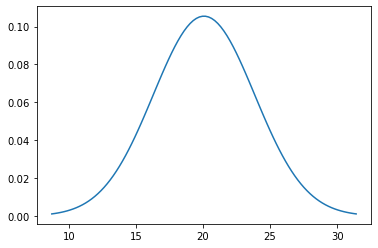

In [157]:
mu = 20.07
variance = 14.30
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()
